# NLP: CLASSIFICATION OF SONG LYRICS WITH EXPLICIT CONTENT

## Part 2: Exploratory Data Analysis (EDA)

In [1]:
import pandas as pd
from src.eda import *
%matplotlib inline

In [2]:
data = pd.read_csv("./data/data.csv", converters={"prepped_lyrics": eval,
                                                  "lemmatized": eval,
                                                  "unique_words": eval})
data.drop(["artist", "language", "text", "prepped_lyrics"], axis=1, inplace=True)
data.head()

,song,explicit_label,lemmatized,unique_words
0,"Andante, Andante",0,"[take, easy, please, touch, gently, summer, ev...","[thousand, butterfly, slow, night, soul, body,..."
1,As Good As New,0,"[never, know, go, put, lousy, rotten, show, bo...","[take, say, found, another, way, know, thank, ..."
2,Bang-A-Boomerang,0,"[make, somebody, happy, question, give, take, ...","[show, tool, boomerang, throw, found, boom, kn..."
3,Chiquitita,0,"[chiquitita, tell, wrong, enchain, sorrow, eye...","[shoulder, cry, candle, feather, best, way, so..."
4,Dancing Queen,0,"[dance, jive, time, life, see, girl, watch, sc...","[light, teaser, leave, night, another, dance, ..."


### How many songs per class?

There are almost 20 times as many non-explicit songs as there are explicit songs. This signals a dataset with imbalanced classes. We will need to deal with this in our models.

In [3]:
data.groupby(["explicit_label"]).agg(number_songs=("lemmatized", "count"))

,number_songs
explicit_label,
0,23132
1,1350


### Word count

The boxplot shows that explicit songs have more words (both unique and non-unique) than non-explicit songs as a whole. However, the boxplot and the histograms show that the distribution of word count is much more skewed in non-explicit songs than explicit songs. We also see that the unique word count is only about half the raw word count for both classes. Therefore, it may a good idea to build models with all of the words and with only the unique words, then compare the difference in results.

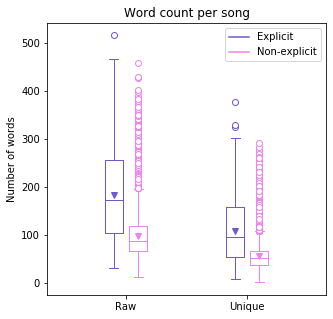

In [4]:
boxplot_word_count(data)

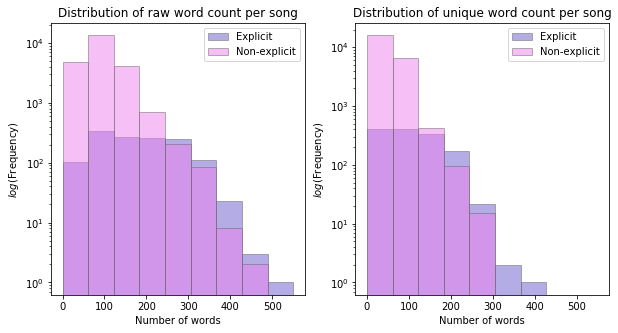

In [5]:
hist_word_count(data)

### Word frequency

#### WordCloud

The WordClouds show some stark yet expected differences between explicit and non-explicit songs! We also see that explict and non-explicit songs share a lot of frequent words in common.

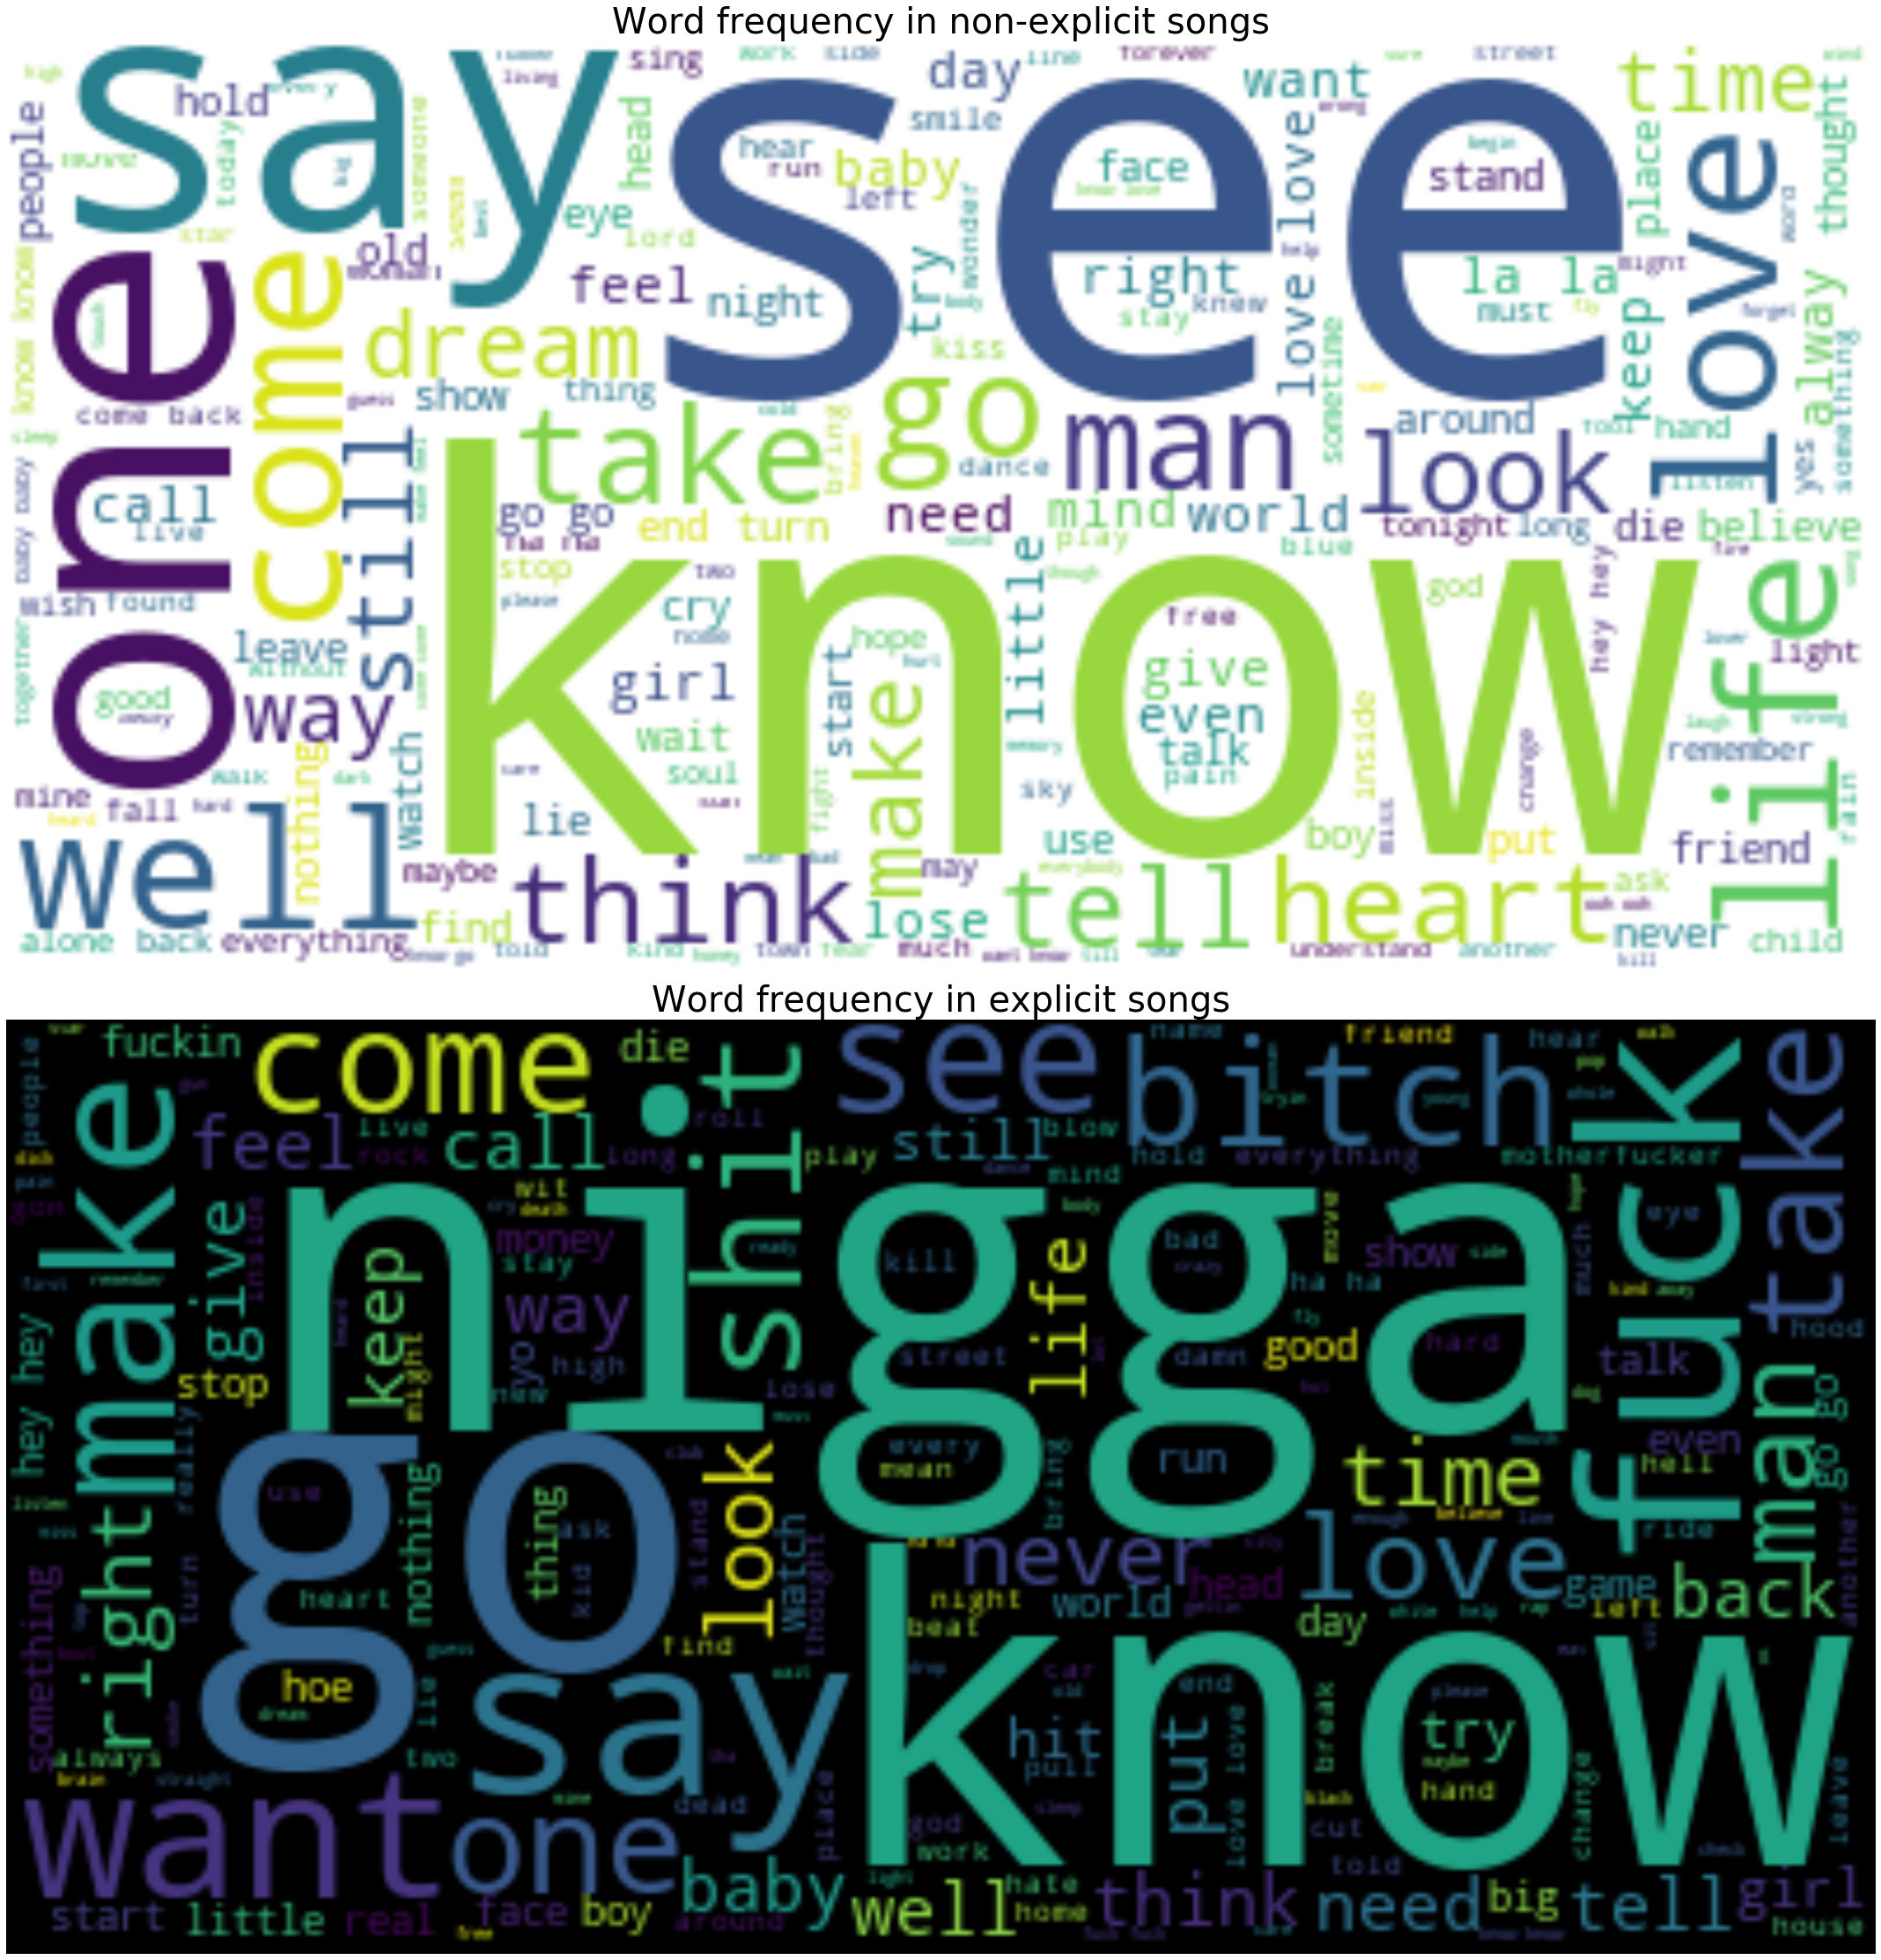

In [6]:
plot_wordcloud(data)

The histograms break down the distribution of word frequency even more. Words like `go`, `know`, `want` are very common in both classes. This is expected - imagine writing a song without using these words! We also see that the explicit songs have a lot more expletives, which is not surprising at all. What is interesting is that in the explicit songs, the occurrence frequency of some of the expletives rank immediately after the most common shared words.

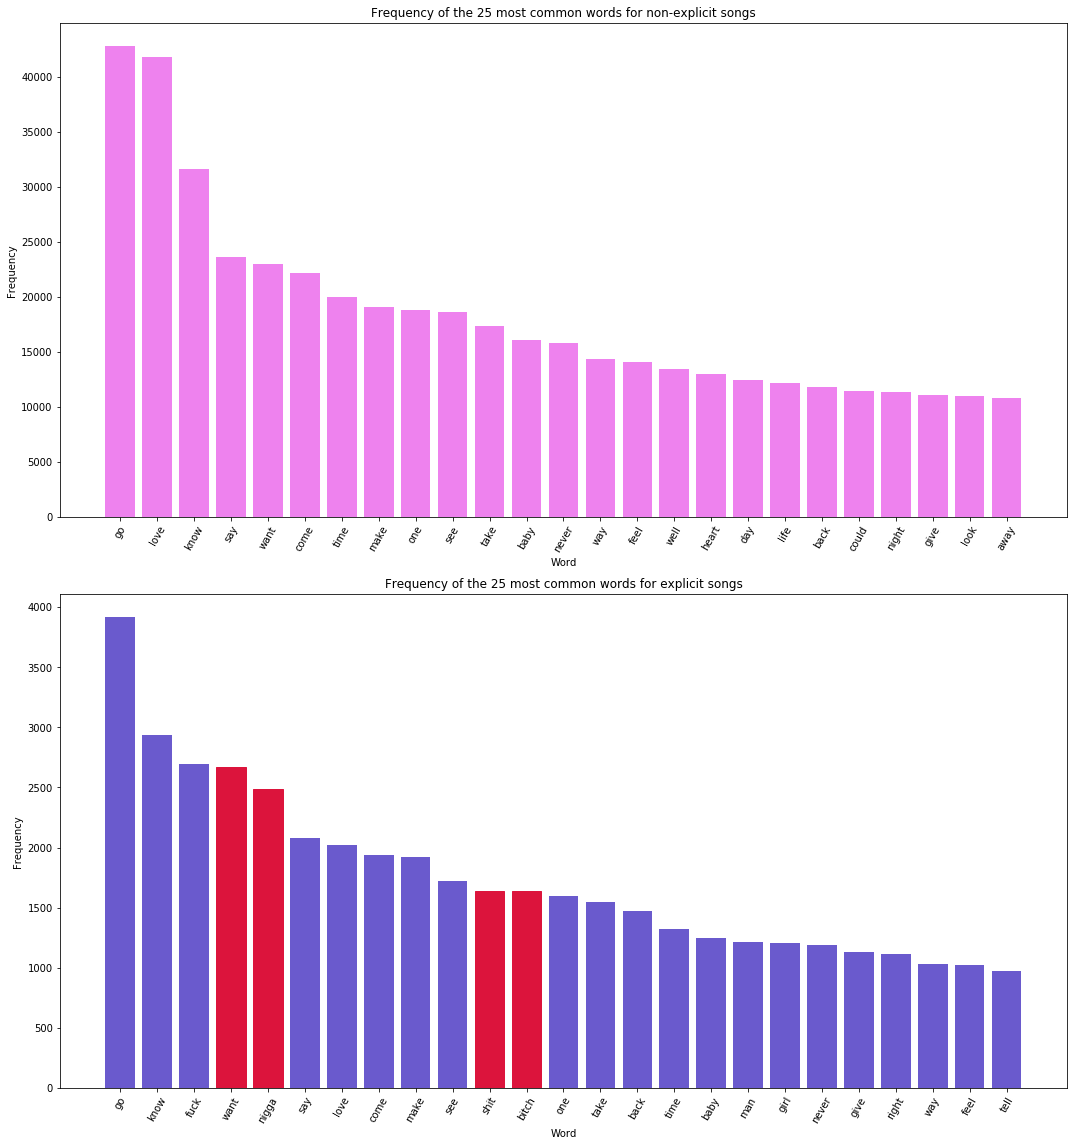

In [7]:
get_freq(data)

### Sentiment analysis

From the histogram, the majority of the songs have positive sentiments.

,song,explicit_label,lemmatized,unique_words,word_count,unique_word_count,lemma_str,sentiment
0,"Andante, Andante",0,"[take, easy, please, touch, gently, summer, ev...","[thousand, butterfly, slow, night, soul, body,...",119,41,take easy please touch gently summer even bree...,0.291667
1,As Good As New,0,"[never, know, go, put, lousy, rotten, show, bo...","[take, say, found, another, way, know, thank, ...",150,63,never know go put lousy rotten show boy tough ...,0.306381
2,Bang-A-Boomerang,0,"[make, somebody, happy, question, give, take, ...","[show, tool, boomerang, throw, found, boom, kn...",132,56,make somebody happy question give take learn s...,0.009459
3,Chiquitita,0,"[chiquitita, tell, wrong, enchain, sorrow, eye...","[shoulder, cry, candle, feather, best, way, so...",114,58,chiquitita tell wrong enchain sorrow eye hope ...,-0.019366
4,Dancing Queen,0,"[dance, jive, time, life, see, girl, watch, sc...","[light, teaser, leave, night, another, dance, ...",93,48,dance jive time life see girl watch scene digg...,0.226238


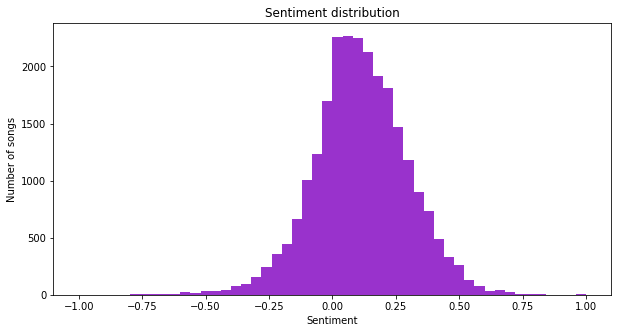

In [8]:
hist_sentiment(data)
data.head()

We also know that the majority of our songs are non-explicit, so we wanted to see if these are the songs contributing to the positive sentiments. The boxplot shows that overall, the non-explicit songs have more positive sentiments than the explicit ones. However, both classes have outliers on both sides.

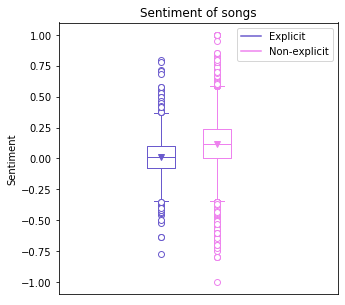

In [9]:
boxplot_sentiment(data)

In [10]:
data.to_csv("./data/data.csv")

From all of the plot above, we should pay attention to word count, sentiment, and various keywords in our models as they seem to be distinct between the classes.